In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

In [2]:
dataorig=pd.read_csv("Pizza.csv")#lectura del csv
dataorig

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [3]:
dataorig.value_counts()#miramos los distintos valores de los datos

brand  id     mois   prot   fat    ash   sodium  carb   cal 
H      24089  35.74  7.86   14.27  1.40  0.44    40.73  3.23    2
J      14045  46.84  9.91   15.50  2.27  0.57    25.48  2.81    2
E      14126  37.78  8.30   13.05  1.64  0.49    39.23  3.08    2
J      14044  47.60  10.43  15.18  2.32  0.56    24.47  2.76    2
E      24110  37.34  7.33   19.61  1.60  0.45    34.12  3.42    2
                                                               ..
G      24047  29.06  8.46   14.12  1.47  0.47    46.89  3.48    1
       24059  25.00  8.49   16.87  1.45  0.47    48.19  3.79    1
       24119  27.16  8.27   14.68  1.79  0.46    48.10  3.58    1
       24121  28.33  8.17   13.64  1.45  0.47    48.41  3.49    1
A      14005  30.49  21.28  41.65  4.82  1.64    1.76   4.67    1
Length: 295, dtype: int64

In [4]:
dataorig.info()#missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [5]:
dataorig.columns#mostramos el nombre de las columnas

Index(['brand', 'id', 'mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal'], dtype='object')

In [6]:
data=dataorig[['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal']]

Escogemos solo las variables que se utilicen para el PCA.
En este caso el id no tiene relevancia y brand es la variable para la cual se calcula el PCA.

In [7]:
nombresvar=data.columns#guardamos los nombres de las columnas dentro de nombrees var

# 1. Lo primero que habrá que hacer será estandarizar los datos para que las diferencias de rango no supongan un problema a la hora de procesar la información. Usa para ello el método StandardScaler de la librería scikit-learn.

In [8]:
#Uso del scaler
scaler=sk.preprocessing.StandardScaler()
data=scaler.fit_transform(data) 
data

array([[-1.37181459,  1.25418127,  2.74984143, ...,  2.97668662,
        -1.22751105,  2.68012924],
       [-1.30156227,  1.22771661,  2.64047481, ...,  3.03077869,
        -1.21362189,  2.53473344],
       [-1.31624186,  1.03000998,  2.85139615, ...,  2.59804213,
        -1.22584435,  2.71243942],
       ...,
       [ 0.3823963 , -0.36794707, -0.46866201, ..., -0.07951534,
         0.1730719 , -0.56704362],
       [ 0.70220164, -0.45823828, -0.56352082, ..., -0.29588362,
         0.08918137, -0.82552504],
       [ 0.62251244, -0.53918903, -0.52780927, ..., -0.26883759,
         0.14529358, -0.7447496 ]])

# 2. El segundo paso será a partir de los datos anteriores, obtener los autovalores (eigenvalues) y los autovectores (eigenvectors) que nos permitan explicar cuántos componentes necesitamos para representar los datos iniciales. Para ello primer habrá que obtener la matriz de covarianza mediante el método cov de numpy y después aplicarle a dicha matriz el método linalg.eig también de numpy. Obten un DataFrame con el porcentaje de varianza y el acumulado por cada componente. Explica que quieren decir estosdatos. ¿Cuánto información perdemos con 2 componentes? ¿Cuánta información representamos con 3 componentes?

In [9]:
#Matriz de covarianza.
#Para ello usamos la traspuesta como se muestra en la libreri
matrizcov=np.cov(data.T)
matrizcov

array([[ 1.00334448,  0.36145252, -0.17189118,  0.26644367, -0.10262097,
        -0.59378092, -0.7669972 ],
       [ 0.36145252,  1.00334448,  0.49966723,  0.82659903,  0.43056473,
        -0.85639691,  0.07049308],
       [-0.17189118,  0.49966723,  1.00334448,  0.79428157,  0.93644671,
        -0.64237943,  0.76712418],
       [ 0.26644367,  0.82659903,  0.79428157,  1.00334448,  0.8108249 ,
        -0.90199502,  0.32756032],
       [-0.10262097,  0.43056473,  0.93644671,  0.8108249 ,  1.00334448,
        -0.6222505 ,  0.67420485],
       [-0.59378092, -0.85639691, -0.64237943, -0.90199502, -0.6222505 ,
         1.00334448, -0.02356313],
       [-0.7669972 ,  0.07049308,  0.76712418,  0.32756032,  0.67420485,
        -0.02356313,  1.00334448]])

In [10]:
#Esta funcion devuelve un array con los autovalores y los autovectores
values, vectors = np.linalg.eig(matrizcov)
print('eigenvalues:',values)
print('eigenvectors:',vectors)

eigenvalues: [4.18573434e+00 2.29811778e+00 4.15948838e-01 9.54925358e-02
 2.77695834e-02 3.38738483e-04 9.55061572e-06]
eigenvectors: [[ 6.47093729e-02  6.28275866e-01 -4.21668945e-01 -2.20721584e-01
   6.47029345e-03 -4.46449902e-01 -4.18569035e-01]
 [ 3.78760904e-01  2.69706650e-01  7.46027442e-01 -1.05931982e-02
   3.87982788e-01  1.71520299e-04 -2.76764643e-01]
 [ 4.46665915e-01 -2.34379085e-01 -1.99308714e-01 -5.07042158e-01
  -1.73367634e-01  5.25402868e-01 -3.77671525e-01]
 [ 4.71889526e-01  1.10990417e-01  5.62726863e-02  5.52398549e-01
  -6.70885701e-01 -5.88609281e-02 -5.60214003e-02]
 [ 4.35702887e-01 -2.01661652e-01 -4.55168874e-01  4.46276890e-01
   6.02614079e-01 -3.13098518e-03  5.24323817e-04]
 [-4.24913712e-01 -3.20312078e-01  5.22365058e-02  3.34339481e-01
  -7.43689883e-03  5.08853525e-04 -7.76067911e-01]
 [ 2.44487304e-01 -5.67457559e-01  1.13315588e-01 -2.79263154e-01
  -7.80031747e-02 -7.21913853e-01 -1.20598098e-02]]


In [11]:
#Como los autovalores no se pueden repetir solo nos quedamos con los unicos
values=np.unique(values)
#Invertimos el orden de los autovalores
values=np.flip(values)

In [12]:
len(values)

7

Como hay 7 autovalores hay 7 componentes que coincide con el numero de datos que tenemos

In [13]:
#Creamos dataframe donde se guardaran la informacion del porcentaje de varianza y del acumulado
dataframe = pd.DataFrame(columns=['componente','varianza'])

In [14]:
#Porcentaje de varianza siguiendo la formula de los apuntes
# (autovalor *100 / sumatorio de los autovalores)
for i in range(0,len(values)):
    #Utilizamos la formula
    varianza=(values[i]*100)/sum(values)
    #Añadimos los datos al dataframe
    dataframe = dataframe.append({'componente': i, 'varianza' : varianza}, ignore_index=True)
#Creamos columna que hace referencia a la varianza acumulada
dataframe['varianza acumulada']=dataframe['varianza'].cumsum()

In [15]:
dataframe

,componente,varianza,varianza acumulada
0,0.0,59.596884,59.596884
1,1.0,32.720820,92.317704
2,2.0,5.922319,98.240023
3,3.0,1.359632,99.599655
4,4.0,0.395386,99.995041
5,5.0,0.004823,99.999864
6,6.0,0.000136,100.000000


## Explica que quieren decir estos datos.

Este dataframe contiene la informacion de la varianza y de la varianza acumulada en funcion del numero de componentes se utilizan. 
* La columna de la varianza indica la informacion que cada componente aporta
* La varianza acumulada dado que se trata de la suma de las filas anteriores indica la informacion que aportan este componente y todos los anteriores

##  ¿Cuánto información perdemos con 2 componentes? 

Teniendo en cuenta que la columna de la varianza acumulada indica cuanta informacion obtenemos en funcion del numero de componentes podemos concluir la informacion que representa el uso de n componentes y ,por lo tanto, tambien la informacion que se pierde. 

In [16]:
print('Informacion que representamos con 2 componentes: '+ str(dataframe['varianza acumulada'].loc[1])+'%')
print('Informacion que perdemos con 2 componentes: '+ str(100-dataframe['varianza acumulada'].loc[1])+'%')

Informacion que representamos con 2 componentes: 92.31770406002875%
Informacion que perdemos con 2 componentes: 7.6822959399712545%


##  ¿Cuánto información representamos con 3 componentes? 

In [17]:
print('Informacion que representamos con 3 componentes: '+ str(dataframe['varianza acumulada'].loc[2])+'%')
print('Informacion que perdemos con 3 componentes: '+ str(100-dataframe['varianza acumulada'].loc[2])+'%')

Informacion que representamos con 3 componentes: 98.24002323541897%
Informacion que perdemos con 3 componentes: 1.759976764581026%


# 3. Por último queremos representar gráficamente los individuos de nuestro dataset, pero usando los valores de las componentes principales obtenidas. Obtén un diagrama de dispersión en 2 dimensiones y comenta que has interpretado en él. Es necesario que el diagrama contenga toda la información necesaria. Habrá que interpreta que información proporciona el eje X y el eje Y. Por último, elegir al menos 4 individuos y explicar qué pasa con ellos.

Para crear el dataframe con los valores de los componentes principales y la informacion de los individuos haremos uso de los eigenvectors.

In [18]:
#Convertimos los datos del scaler en un dataframe
dataindividuos=pd.DataFrame(data) 
dataindividuos

,0,1,2,3,4,5,6
0,-1.371815,1.254181,2.749841,1.953894,2.976687,-1.227511,2.680129
1,-1.301562,1.227717,2.640475,2.135338,3.030779,-1.213622,2.534733
2,-1.316242,1.030010,2.851396,1.930227,2.598042,-1.225844,2.712439
3,-1.085563,1.054918,2.555660,1.701449,2.543950,-1.193622,2.373183
4,-1.091854,1.230830,2.390494,1.725116,2.625088,-1.172510,2.260097
...,...,...,...,...,...,...,...
295,0.420144,-0.358607,-0.360411,-0.112995,-0.025423,0.138627,-0.583199
296,0.235600,-0.246521,-0.197477,-0.160329,0.001623,0.072514,-0.276252
297,0.382396,-0.367947,-0.468662,-0.160329,-0.079515,0.173072,-0.567044
298,0.702202,-0.458238,-0.563521,-0.247106,-0.295884,0.089181,-0.825525


In [19]:
#Convertimos los datos de los eigenvectores en un dataframe
datavectors=pd.DataFrame(vectors) 
datavectors

,0,1,2,3,4,5,6
0,0.064709,0.628276,-0.421669,-0.220722,0.006470,-0.446450,-0.418569
1,0.378761,0.269707,0.746027,-0.010593,0.387983,0.000172,-0.276765
2,0.446666,-0.234379,-0.199309,-0.507042,-0.173368,0.525403,-0.377672
3,0.471890,0.110990,0.056273,0.552399,-0.670886,-0.058861,-0.056021
4,0.435703,-0.201662,-0.455169,0.446277,0.602614,-0.003131,0.000524
5,-0.424914,-0.320312,0.052237,0.334339,-0.007437,0.000509,-0.776068
6,0.244487,-0.567458,0.113316,-0.279263,-0.078003,-0.721914,-0.012060


In [20]:
type(data)#Miramos el tipo de datos para saber si se pueden multiplicar

numpy.ndarray

In [21]:
type(vectors)#Miramos el tipo de datos para saber si se pueden multiplicar

numpy.ndarray

In [22]:
dataindividuos.info()#missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       300 non-null    float64
 1   1       300 non-null    float64
 2   2       300 non-null    float64
 3   3       300 non-null    float64
 4   4       300 non-null    float64
 5   5       300 non-null    float64
 6   6       300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [23]:
datavectors.info()#missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7 non-null      float64
 1   1       7 non-null      float64
 2   2       7 non-null      float64
 3   3       7 non-null      float64
 4   4       7 non-null      float64
 5   5       7 non-null      float64
 6   6       7 non-null      float64
dtypes: float64(7)
memory usage: 520.0 bytes


<AxesSubplot:title={'center':'Diagrama de dispersion del componente 0 y 1'}, xlabel='0', ylabel='1'>

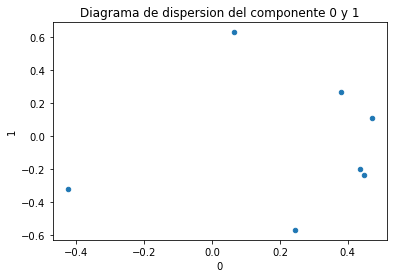

In [24]:
datavectors.plot(0,1,'scatter',title='Diagrama de dispersion del componente 0 y 1')

Multiplicamos las matrices para poder utilizar los datos de los individuos y los datos de los componentes principales.

In [25]:
datafinal=dataindividuos.dot(datavectors)
datafinal

,0,1,2,3,4,5,6
0,5.010343,-2.679215,-0.039327,0.144106,0.284015,-0.002339,0.000960
1,5.023755,-2.529295,-0.097056,0.353950,0.215269,0.002952,0.001022
2,4.805439,-2.673700,-0.075475,-0.107798,-0.035038,0.005424,0.000832
3,4.469543,-2.285029,-0.120233,-0.054028,0.174501,0.005627,0.000946
4,4.471893,-2.159152,-0.000738,0.117166,0.313027,0.001689,0.000968
...,...,...,...,...,...,...,...
295,-0.535510,0.530843,-0.426490,0.229258,0.031016,0.050825,-0.034726
296,-0.339636,0.243230,-0.281174,0.064289,0.069664,-0.000082,0.000233
297,-0.646433,0.515434,-0.370378,0.249294,0.043557,0.002110,0.000239
298,-0.865078,0.921790,-0.493755,0.127400,-0.024342,0.001823,0.000163


Dado que se nos pide que se cree un diagrama de dos dimensiones hay que utilizar dos componentes, que corresponde con las dos primeras columnas.

<AxesSubplot:title={'center':'Diagrama de dispersion del componente 0 y 1'}, xlabel='0', ylabel='1'>

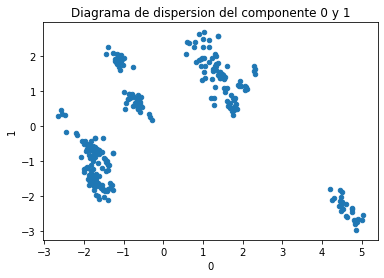

In [26]:
datafinal.plot(0,1,'scatter',title='Diagrama de dispersion del componente 0 y 1')

In [27]:
nombresvar

Index(['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal'], dtype='object')

En este diagrama podemos ver 4 grupos bien diferenciados ya sea por valores altos de la componente 0 como de la componente 1.
Y el componente 0 pintado en el eje x quizas puede representar la cantidad de calorias que tienen las pizzas, mientras que, el componente 1 pintado en el eje y puede representar la cantidad de proteina o la cantidad de ash o sodio.

Dado que en el caso de que las variables que representen sea calorias e hidratos de carbono o calorias y fats estarian mas relacionadas. Ya que por ejemplo 1 gramo de grasa son 9 calorias a diferencia de la proteina que son 4 calorias.

### Por último, elegir al menos 4 individuos y explicar qué pasa con ellos.

In [28]:
#Seleccionamos a los 4 individuos con los dos componentes
datatest=datafinal[[0,1]].head(4)
datatest

,0,1
0,5.010343,-2.679215
1,5.023755,-2.529295
2,4.805439,-2.673700
3,4.469543,-2.285029


<AxesSubplot:title={'center':'Diagrama de dispersion del componente 0 y 1'}, xlabel='0', ylabel='1'>

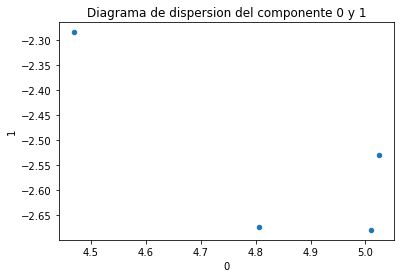

In [29]:
datatest.plot(0,1,'scatter',title='Diagrama de dispersion del componente 0 y 1')

In [30]:
r = np.corrcoef(datatest[0], datatest[1])[1][0]
r

-0.7793635200712113

Podemos ver en este caso como los datos son bastante extremos, es decir, el valor del componente 0 y el del componente 1 difieren mucho.
Ademas tras calcular el coeficiente de pearson podemos darnos cuenta que tienen una correlacion negativa bastante alta por lo que se podria afirmar que son inversamente proporcionales.

Por lo tanto la hipotesis de que las variables que representan son las calorias y las proteinas es erronea dado que en este caso la relacion seria positiva no negativa
En conclusión en el caso de que uno de los dos componentes sean las calorias el otro no puede ser ni las fats, ni los carbs, ni la proteina dado que entonces la relacion seria lineal positiva no negativa.

# 4. Realiza los mismos pasos que en los pasos anteriores usando la librería scikit-learn. Compara los resultados y coméntalos.

In [31]:
#Utilizamos PCA de la libreria sklearn
# con numero de componentes que es el numero de variables 
pca=sk.decomposition.PCA(n_components=len(nombresvar)) 
# fit de los datos, este data es el que ya se ha estandarizado con el scaler
pca.fit(data) 
#Transformamos los datos
datapca=pca.transform(data) 

In [32]:
#Guardamos la varianza de los componentes en un dataframe
varianza=pca.explained_variance_ratio_
dataframepca=pd.DataFrame(varianza,columns=['varianza']) 
dataframepca['varianza acumulada']=dataframepca['varianza'].cumsum()
dataframepca['Componente']=range(0,7)
dataframepca

,varianza,varianza acumulada,Componente
0,0.595969,0.595969,0
1,0.327208,0.923177,1
2,0.059223,0.982400,2
3,0.013596,0.995997,3
4,0.003954,0.999950,4
5,0.000048,0.999999,5
6,0.000001,1.000000,6


In [33]:
dataframe#Data sin utilizar sklearn

,componente,varianza,varianza acumulada
0,0.0,59.596884,59.596884
1,1.0,32.720820,92.317704
2,2.0,5.922319,98.240023
3,3.0,1.359632,99.599655
4,4.0,0.395386,99.995041
5,5.0,0.004823,99.999864
6,6.0,0.000136,100.000000


Podemos ver que no se ha alejado mucho de lo obtenido previmente.

##  ¿Cuánto información perdemos con 2 componentes? 

In [34]:
#En este caso los datos estan normalizados
print('Informacion que representamos con 2 componentes: '+ str(dataframepca['varianza acumulada'].loc[1])+'%')
print('Informacion que perdemos con 2 componentes: '+ str(1-dataframepca['varianza acumulada'].loc[1])+'%')

Informacion que representamos con 2 componentes: 0.9231770406002875%
Informacion que perdemos con 2 componentes: 0.07682295939971251%


##  ¿Cuánto información representamos con 3 componentes? 

In [35]:
#En este caso los datos estan normalizados
print('Informacion que representamos con 3 componentes: '+ str(dataframepca['varianza acumulada'].loc[2])+'%')
print('Informacion que perdemos con 3 componentes: '+ str(1-dataframepca['varianza acumulada'].loc[2])+'%')

Informacion que representamos con 3 componentes: 0.9824002323541897%
Informacion que perdemos con 3 componentes: 0.017599767645810283%


### 3. Por último queremos representar gráficamente los individuos de nuestro dataset, pero usando los valores de las componentes principales obtenidas. Obtén un diagrama de dispersión en 2 dimensiones y comenta que has interpretado en él. Es necesario que el diagrama contenga toda la información necesaria. Habrá que interpreta que información proporciona el eje X y el eje Y. Por último, elegir al menos 4 individuos y explicar qué pasa con ellos.

In [36]:
datapca

array([[ 5.01034284e+00,  2.67921532e+00, -3.93268132e-02, ...,
        -2.84015338e-01,  2.33883199e-03, -9.60239802e-04],
       [ 5.02375538e+00,  2.52929455e+00, -9.70564299e-02, ...,
        -2.15268884e-01, -2.95190997e-03, -1.02204030e-03],
       [ 4.80543930e+00,  2.67370033e+00, -7.54750714e-02, ...,
         3.50375561e-02, -5.42367516e-03, -8.31756992e-04],
       ...,
       [-6.46432696e-01, -5.15433604e-01, -3.70378252e-01, ...,
        -4.35570456e-02, -2.11048891e-03, -2.38808704e-04],
       [-8.65078270e-01, -9.21790425e-01, -4.93755001e-01, ...,
         2.43420521e-02, -1.82275203e-03, -1.63034757e-04],
       [-8.95868414e-01, -7.67878473e-01, -5.30107575e-01, ...,
         2.64133916e-02, -1.01749397e-04, -1.38425944e-04]])

In [37]:
#Transformamos los datos en un dataframe para poder representar
dataframepca1=pd.DataFrame(datapca) 
dataframepca1

,0,1,2,3,4,5,6
0,5.010343,2.679215,-0.039327,0.144106,-0.284015,0.002339,-0.000960
1,5.023755,2.529295,-0.097056,0.353950,-0.215269,-0.002952,-0.001022
2,4.805439,2.673700,-0.075475,-0.107798,0.035038,-0.005424,-0.000832
3,4.469543,2.285029,-0.120233,-0.054028,-0.174501,-0.005627,-0.000946
4,4.471893,2.159152,-0.000738,0.117166,-0.313027,-0.001689,-0.000968
...,...,...,...,...,...,...,...
295,-0.535510,-0.530843,-0.426490,0.229258,-0.031016,-0.050825,0.034726
296,-0.339636,-0.243230,-0.281174,0.064289,-0.069664,0.000082,-0.000233
297,-0.646433,-0.515434,-0.370378,0.249294,-0.043557,-0.002110,-0.000239
298,-0.865078,-0.921790,-0.493755,0.127400,0.024342,-0.001823,-0.000163


<AxesSubplot:xlabel='0', ylabel='1'>

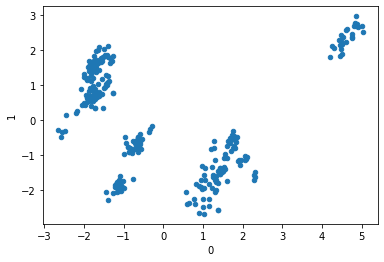

In [38]:
#Representamos los dos componentes
dataframepca1.plot(0,1,'scatter')

Podemos ver que la grafica tampoco varia mucho.

En este diagrama a diferencia del otro podemos ver como el componente 1 y el componente 2 estan muy relacionados dado que a mayor valor de x mayor valor de y, en este caso si que el componente 1 podria ser las calorias y el componente 2 podria ser fat.

### Por último, elegir al menos 4 individuos y explicar qué pasa con ellos.

In [39]:
#Seleccionamos a los 4 individuos con los dos componentes
datatest=dataframepca1[[0,1]].head(4)
datatest

,0,1
0,5.010343,2.679215
1,5.023755,2.529295
2,4.805439,2.673700
3,4.469543,2.285029


<AxesSubplot:title={'center':'Diagrama de dispersion del componente 0 y 1'}, xlabel='0', ylabel='1'>

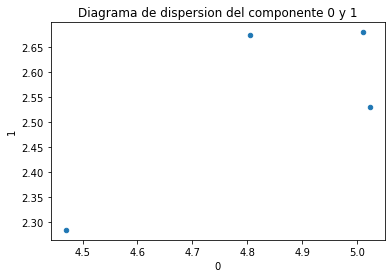

In [40]:
datatest.plot(0,1,'scatter',title='Diagrama de dispersion del componente 0 y 1')

In [41]:
r = np.corrcoef(datatest[0], datatest[1])[1][0]
r

0.7793635200712097

Como he explicado anteriormente, en este caso el componente 1 y el componente 2 estan muy relacionados y este se ha demostrado dado que tiene un coeficiente de pearson elevado y ademas es positivo por lo que se podria afirmar que son directamente proporcionales.
Es decir a mayor valor del componente 0 mayor valor del componente 1.

La diferencia entre las dos graficas es que la que no se ha realizado con sklearn tenia un pearson igual pero negativo por lo que las variables estaban inversamente relacionadas, a diferencia de este caso.

# Referencias
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
https://numpy.org/doc/stable/reference/generated/numpy.cov.html
https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html